## Problem

Find optima for Rosenbrock function under the defined constraints using penalty methods  instead of bounds.


\begin{equation*}
min f(x) =\sum _{i=1}^{D-1}\:100\:\left(x_i + {1-x_i^2}\right)^2+\left(x_i-1\right)^2
\end{equation*}

\begin{equation*}
x \epsilon  [-5,10]
\end{equation*}

First we import some kick ass libraries. **Boom!**

In [19]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize
from scipy.optimize import Bounds
import matplotlib.pyplot as plt
import math 

### The Rosenbrock function

Let's see what we've got. We plot this bullshit function in:
\begin{equation*}
z(x)
\end{equation*}
\begin{equation*}
x \epsilon \mathbb{R^2}
\end{equation*}




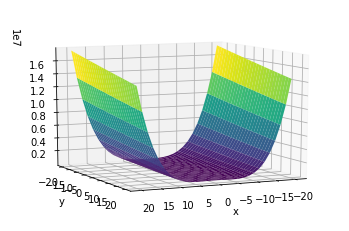

In [20]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def f(x, y):
    return ((1-x) ** 2 + 100 * (y - x ** 2 )**2)

x = np.linspace(-20, 20, 30)
y = np.linspace(-20, 20, 30)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)
fig = plt.figure()
ax = plt.axes(projection='3d')
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.view_init(10, 65)


### Constrained Optimization using Nelder-Mead Simplex

The minimizer takes care of this bullshit, we just need to define the bounds, send them to the solver as a parameter and that's it. We get the results in no time. I know more about about optimization than, proabably, anyone.

In [21]:
#Generalized rosenbrock funtion (R^n)
def J(x):
    return sum(100.0*(x[1:]-x[:-1]**2.0)**2.0 + (1-x[:-1])**2.0)


In [25]:
bounds = Bounds(lb=-5, ub=10)
x0_10d= np.random.uniform(low=-5, high=10, size=(10,))

res = minimize(J, x0_10d, method='nelder-mead',
               options={'xatol': 1e-4, 'maxiter': 250}, bounds=bounds)
print(res)


 final_simplex: (array([[ 1.13194622,  0.99595514,  1.61226533, -0.21839298,  1.57579134,
         1.58118521,  1.31671551,  1.49416801,  2.22401969,  4.4595512 ],
       [ 1.07330083,  1.00676645,  1.58013531, -0.20213797,  1.50797662,
         1.64051414,  1.34649893,  1.76364877,  2.33168996,  4.60178431],
       [ 0.95714277,  1.00940608,  1.54248843, -0.1896463 ,  1.42375902,
         1.66596249,  1.18110055,  1.70696329,  2.44078735,  4.71024396],
       [ 1.27285915,  1.00915742,  1.52037289, -0.19777495,  1.57977503,
         1.46729829,  1.02284907,  1.69436816,  2.43675192,  4.70284842],
       [ 1.1253557 ,  1.00459435,  1.54236967, -0.17370762,  1.53423722,
         1.83050638,  1.29334748,  1.63734998,  2.35307878,  4.71936323],
       [ 0.88587478,  1.014876  ,  1.61783762, -0.20417344,  1.52987979,
         1.6678242 ,  1.03197579,  1.5668624 ,  2.11245342,  4.57342837],
       [ 1.11877144,  0.99238696,  1.63044857, -0.22333725,  1.50953797,
         1.7283821 ,  1.2532

### Using Exterior Penalty Function Method

Well that's great but we want to try to formulate this problem as an unconstrained optimization problem. Don't know why we want to do that, but my professor says I should do it like this so shut the fuck up.

Before starting, convert any constraints into the
form (expression) ≤ 0. 

We transform this bullshit from this:
\begin{equation*}
x \epsilon  [-5,10]
\end{equation*}

into this

\begin{equation*}
x >=-5 
\end{equation*}
\begin{equation*}
x <= 10
\end{equation*}


and then into this:

\begin{equation*}
-x - 5 <= 0
\end{equation*}
\begin{equation*}
x - 10 <= 0
\end{equation*}

Then we define these constraints as functions **g1** and **g2**:

In [10]:
def g1(x):
    return -x -5
    
def g2(x):
    return x - 10

We plot the constraints:


In [38]:
#Will do later (probably never)

Then we proceed to formulate the problem with the penalization term P, a weight on the penalization = 2 and the rosen-fucking-brock bullshit.


In [11]:
def P(x,type):
    if type == "epfm": #Exterior Penalty Function Method
        return (max(0,g1(x)) + max(0,g2(x)))**2
    elif type =="qpfm": #Quadratic Penalty Function
        return (g1(x)+ g2(x))**2
    elif type =="avfm": #Absolute Value Penalty Function
         return numpy.absolute(g1(x)+ g2(x))
    
        
def Jprime(x):
    return J(x) + 2 * P(x[0],"epfm")


Ok, that worked. No we can now evaluate some terms to see how the penalization functions behave.

In [12]:
#In range
print(P(1,"epfm"))
#Out of range upperbound
print(P(11,"epfm"))
#Out of range lowerbound
print(P(-6,"epfm"))
#g1
print(g1(2))
#g2
print(g2(2))


0
1
1
-7
-8


We can verify the arguments of our formula. We can see that when x is within the bounds the penalty termp P goes to 0 and as we move x away from the bounds the penalty increases.

In [13]:
x0_2d = np.array([-6,5])

print ('input: ', x0_2d)
print('J: ', J(x0_2d))
print('P: ', P(x0_2d[0],"epfm"))
print ('Jprime: ',Jprime(x0_2d))


input:  [-6  5]
J:  96149.0
P:  1
Jprime:  96151.0


### Et voilà!

#### Optimize unconstrained function

We have the new objetive function Jprime with the penalization terms, so let's give it to the solver. Solver - solve dat shit!

In [32]:
x0_2d= np.random.uniform(low=-20, high=20, size=(2,))
res = minimize(Jprime, x0_2d, method='nelder-mead',
               options={'xatol': 1e-4, 'maxiter': 250})
print (res)

 final_simplex: (array([[0.99997971, 0.99995771],
       [1.00002429, 1.00004747],
       [0.99997479, 0.99995564]]), array([7.05431266e-10, 7.10968233e-10, 4.30563826e-09]))
           fun: 7.054312664886518e-10
       message: 'Optimization terminated successfully.'
          nfev: 207
           nit: 109
        status: 0
       success: True
             x: array([0.99997971, 0.99995771])


Oh boy. You don't wanna mess with my unconstrained optimization game.